In [1]:
import pandas as pd
import numpy as np
import csv
import os
import io
import csv
from scipy import stats
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [2]:
df = pd.read_csv('KS_sfr_cg.csv')
df.set_index('City', inplace=True)

In [3]:
df.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
City,,,,,,,,,,,,,,,,,,,,,
Bonner Springs,81600.0,82000.0,82500.0,83000.0,83500.0,84100.0,84700.0,85400.0,86100.0,87000.0,...,168400.0,170000.0,171700.0,174400.0,177200.0,179800.0,181200.0,182300.0,183200.0,183900.0
De Soto,98800.0,99500.0,100300.0,101100.0,101900.0,102800.0,103700.0,104700.0,105800.0,107000.0,...,220600.0,219900.0,220200.0,221400.0,222900.0,224500.0,225700.0,229900.0,236300.0,239700.0
Edgerton,76900.0,77300.0,77800.0,78200.0,78600.0,79100.0,79600.0,80100.0,80700.0,81300.0,...,152900.0,155700.0,158200.0,160400.0,161900.0,162500.0,162500.0,163700.0,165000.0,165000.0
Gardner,87900.0,88100.0,88500.0,89100.0,89700.0,90600.0,91600.0,92800.0,94300.0,95800.0,...,198900.0,200500.0,202400.0,204600.0,206100.0,207300.0,208100.0,208700.0,210500.0,212600.0
Kansas City,56957.0,57057.0,57157.0,57286.0,57400.0,57586.0,57771.0,57943.0,58257.0,58586.0,...,98700.0,99614.0,101943.0,103614.0,105586.0,107171.0,108343.0,109300.0,110414.0,111414.0


In [4]:
df_t = df.transpose()

df_t.head()

City,Bonner Springs,De Soto,Edgerton,Gardner,Kansas City,Leawood,Lenexa,Mission,Olathe,Overland Park,Prairie Village,Roeland Park,Shawnee,Spring Hill
1996-04,81600.0,98800.0,76900.0,87900.0,56957.0,197825.0,140675.0,79500.0,101900.0,140033.0,105500.0,100000.0,131420.0,88400.0
1996-05,82000.0,99500.0,77300.0,88100.0,57057.0,198575.0,141850.0,79700.0,102050.0,140244.0,105400.0,99900.0,131700.0,89500.0
1996-06,82500.0,100300.0,77800.0,88500.0,57157.0,199475.0,143100.0,79900.0,102350.0,140511.0,105200.0,99900.0,131940.0,90600.0
1996-07,83000.0,101100.0,78200.0,89100.0,57286.0,200475.0,144300.0,80200.0,102850.0,140822.0,105200.0,99900.0,132300.0,91800.0
1996-08,83500.0,101900.0,78600.0,89700.0,57400.0,201575.0,145575.0,80600.0,103600.0,141233.0,105100.0,100000.0,132660.0,93100.0


In [5]:
df_t.reset_index().plot(x='index', y=['Gardner','Bonner Springs'])

In [6]:
df_t2 = df_t.reset_index()
df_t2 = df_t2.rename(columns = {'index':'Year'})

In [7]:
df_t2.head()

City,Year,Bonner Springs,De Soto,Edgerton,Gardner,Kansas City,Leawood,Lenexa,Mission,Olathe,Overland Park,Prairie Village,Roeland Park,Shawnee,Spring Hill
0,1996-04,81600.0,98800.0,76900.0,87900.0,56957.0,197825.0,140675.0,79500.0,101900.0,140033.0,105500.0,100000.0,131420.0,88400.0
1,1996-05,82000.0,99500.0,77300.0,88100.0,57057.0,198575.0,141850.0,79700.0,102050.0,140244.0,105400.0,99900.0,131700.0,89500.0
2,1996-06,82500.0,100300.0,77800.0,88500.0,57157.0,199475.0,143100.0,79900.0,102350.0,140511.0,105200.0,99900.0,131940.0,90600.0
3,1996-07,83000.0,101100.0,78200.0,89100.0,57286.0,200475.0,144300.0,80200.0,102850.0,140822.0,105200.0,99900.0,132300.0,91800.0
4,1996-08,83500.0,101900.0,78600.0,89700.0,57400.0,201575.0,145575.0,80600.0,103600.0,141233.0,105100.0,100000.0,132660.0,93100.0


In [8]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,25)) 
# create a color palette
palette = plt.get_cmap('tab20')
 
# multiple line plot
num=0
for column in df_t2.drop('Year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(6,3, num)
 
    # Plot the lineplot
    plt.plot(df_t2['Year'], df_t2[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    plt.tick_params(labelbottom='off')
    
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("Housing Price Trend: Kansas 08/04/1996 - 4/30/2018", fontsize=13, fontweight=0, color='black', style='italic', y=1.0)
 
# Axis title
#plt.text(0.5, 0.02, 'Year', ha='center', va='center')
plt.text(0.06, 0.5, 'Year', ha='center', va='center')
plt.ylabel = ('Price')

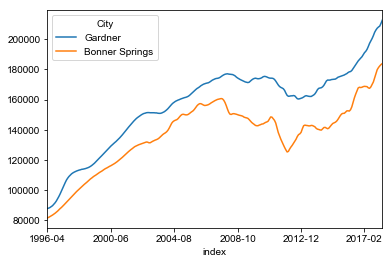

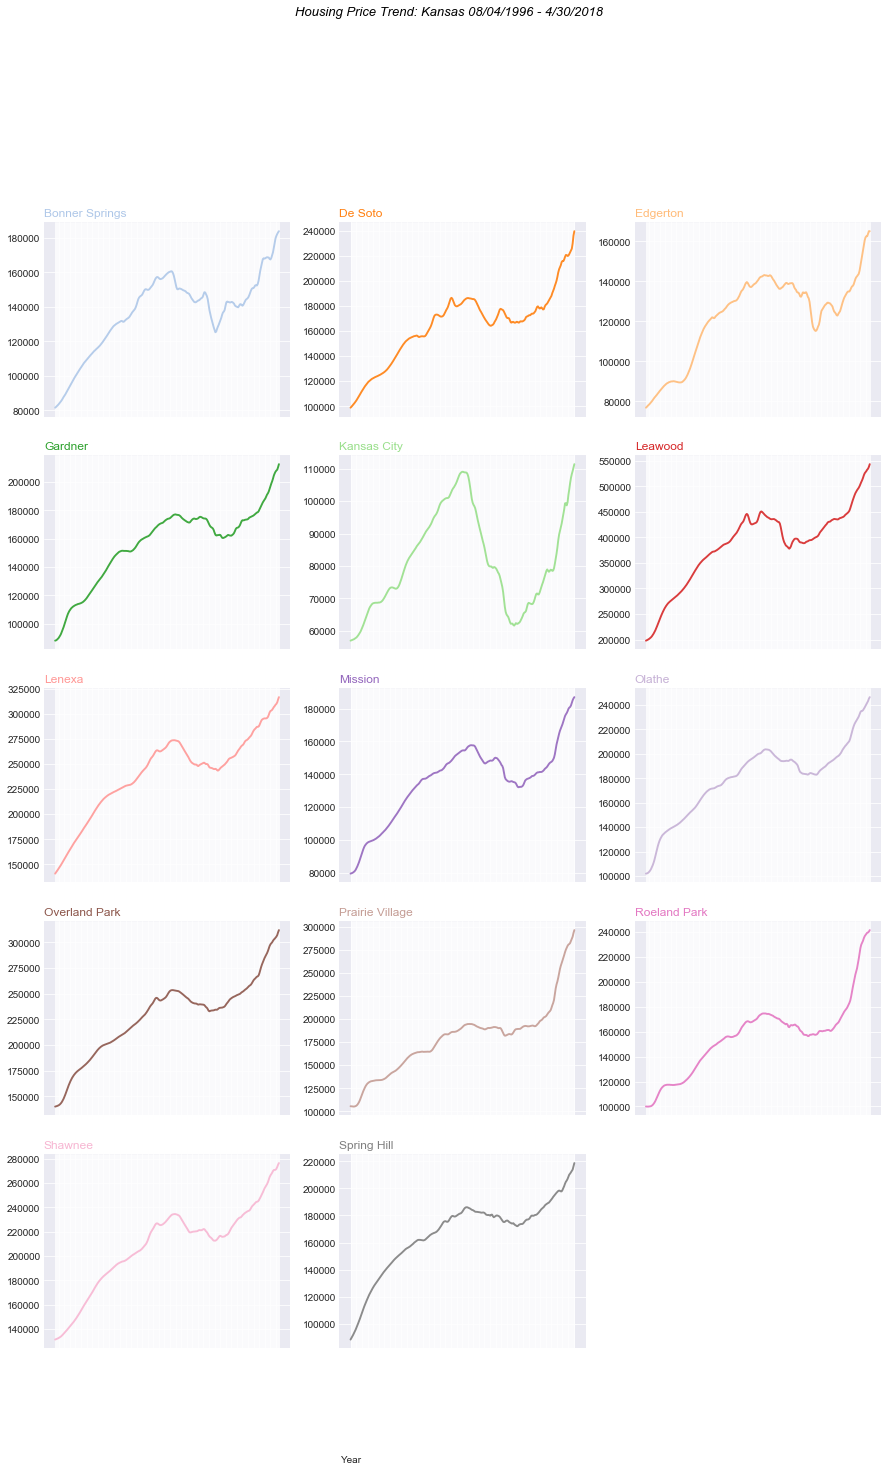

In [9]:

plt.show()

In [10]:
plt.savefig("price_trends")

In [11]:
file_name = os.path.join("KSt_sfr_cg.csv")
df_t.to_csv(file_name, index=False)

In [12]:
SH = df_t2.iloc[:,[0,14]]
SH['Year'] = pd.to_datetime(SH['Year'])
SH = SH.rename(columns = {'Spring Hill':'Spring_Hill'})
SH.head()

C:\Users\carol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


City,Year,Spring_Hill
0,1996-04-01,88400.0
1,1996-05-01,89500.0
2,1996-06-01,90600.0
3,1996-07-01,91800.0
4,1996-08-01,93100.0


In [13]:
SH.dtypes

City
Year           datetime64[ns]
Spring_Hill           float64
dtype: object

In [14]:
file_name = os.path.join("SH_ARIMA1.csv")
SH.to_csv(file_name, index=False)